In [287]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

In [295]:
data = pd.read_csv('appstore_games.csv')
data.head()

#Удалим лишние столбцы, такие как URL, Icon URL
data.columns
data.drop(columns = ['URL', 'Subtitle','Icon URL', 'Description'], inplace = True)

In [296]:
data.head()

,ID,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,284921427,Sudoku,4.0,3553.0,2.99,NaN,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,284926400,Reversi,3.5,284.0,1.99,NaN,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,284946595,Morocco,3.0,8376.0,0.00,NaN,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,285755462,Sudoku (Free),3.5,190394.0,0.00,NaN,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,285831220,Senet Deluxe,3.5,28.0,2.99,NaN,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


Взглянем на самые распространённые языки в играх на iOS.

Небольшая справка для тех, кто не знает все языковые коды (как я):
EN - английский;
ZH - китайский;
DE - немецкий;
FR - французский;
ES - испанский;
JA - японский;
RU - русский;
IT - итальянский;
PT - португальский;
KO - корейский.

In [297]:
langs_dict = {}
for langs in data['Languages']:
    if langs is not np.nan:
        for lang in list(map(lambda x: x.strip(), langs.split(','))):
            if lang in langs_dict:
                langs_dict[lang] += 1
            else:
                langs_dict[lang] = 1

sorted_langs_dict = sorted(langs_dict, key=langs_dict.get, reverse=True)

In [298]:
langs_array = np.zeros((len(data), 10))
for i, lang in enumerate(data['Languages']):
    if lang is not np.nan:
        for j, top_lang in enumerate(sorted_langs_dict[:10]):
            if top_lang in set(list(map(lambda x: x.strip(), lang.split(',')))):
                langs_array[i, j] = 1

In [299]:
for i, lang in enumerate(sorted_langs_dict[:10]):
    data[lang] = langs_array[:, i]

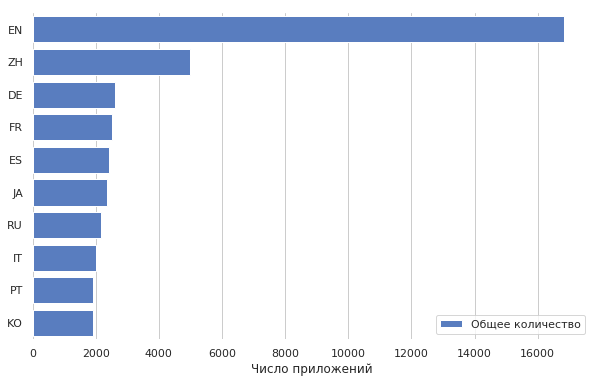

In [300]:
f, ax = plt.subplots(figsize=(10, 6))

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
#sns.set_color_codes("pastel")
sns.barplot(y=sorted_langs_dict[:10], x=sorted(langs_dict.values(), reverse = True)[:10],
            label="Общее количество", color="b")

# Plot the crashes where alcohol was involved
#sns.set_color_codes("muted")
#sns.barplot(x="alcohol", y="abbrev", data=crashes,
#            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Число приложений")
sns.despine(left=True, bottom=True)

Это было очевидно, но нужно больше графиков!

In [321]:
len(data[data.RU == 1]['Average User Rating'])

2179

In [294]:
list(data.columns)

['ID',
 'Name',
 'Average User Rating',
 'User Rating Count',
 'Price',
 'In-app Purchases',
 'Developer',
 'Age Rating',
 'Languages',
 'Size',
 'Primary Genre',
 'Genres',
 'Original Release Date',
 'Current Version Release Date']

In [135]:
data.head()

,ID,Name,Average User Rating,User Rating Count,Price,In-app Purchases,Developer,Age Rating,Languages,Size,...,EN,ZH,DE,FR,ES,JA,RU,IT,PT,KO
0,284921427,Sudoku,4.0,3553.0,2.99,NaN,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,284926400,Reversi,3.5,284.0,1.99,NaN,Kiss The Machine,4+,EN,12328960.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,284946595,Morocco,3.0,8376.0,0.00,NaN,Bayou Games,4+,EN,674816.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,285755462,Sudoku (Free),3.5,190394.0,0.00,NaN,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,285831220,Senet Deluxe,3.5,28.0,2.99,NaN,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [280]:
genres_dict = {}
for genres in data['Genres']:
    if genres is not np.nan:
        for genre in list(map(lambda x: x.strip(), genres.split(','))):
            if genre in genres_dict:
                genres_dict[genre] += 1
            else:
                genres_dict[genre] = 1

sorted_genres_dict = sorted(genres_dict, key=genres_dict.get, reverse=True)

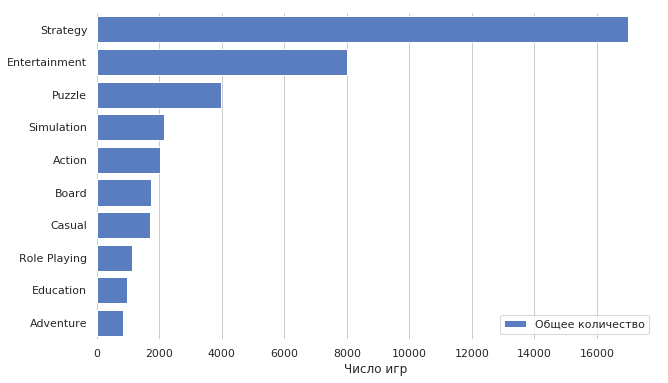

In [285]:
f, ax = plt.subplots(figsize=(10, 6))

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
#sns.set_color_codes("pastel")
sns.barplot(y=sorted_genres_dict[1:11], x=sorted(genres_dict.values(), reverse = True)[1:11],
            label="Общее количество", color="b")

# Plot the crashes where alcohol was involved
#sns.set_color_codes("muted")
#sns.barplot(x="alcohol", y="abbrev", data=crashes,
#            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Число игр")
sns.despine(left=True, bottom=True)

In [337]:
genres_array = np.zeros((len(data), 10))
for i, genre in enumerate(data['Genres']):
    if genre is not np.nan:
        for j, top_genre in enumerate(sorted_genres_dict[1:11]):
            if top_genre in set(list(map(lambda x: x.strip(), genre.split(',')))):
                genres_array[i, j] = 1

In [338]:
for i, genre in enumerate(sorted_genres_dict[1:11]):
    data[genre] = genres_array[:, i]

In [339]:
y = []
for genre in sorted_genres_dict[1:11]:
    y.append(data.groupby(genre)['Size'].median()[1] / 1024 / 1024)

In [343]:
np.array(sorted_genres_dict[1:11])[np.argsort(y)]

array(['Puzzle', 'Board', 'Education', 'Casual', 'Entertainment',
       'Strategy', 'Adventure', 'Action', 'Simulation', 'Role Playing'],
      dtype='<U13')

Text(0, 0.5, 'Размер в Мб')

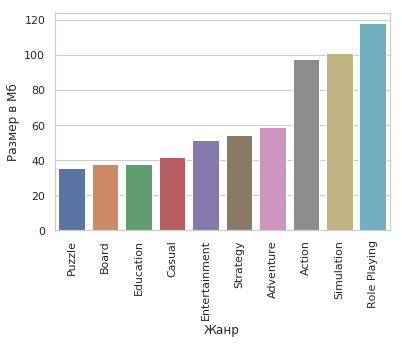

In [347]:
sns.barplot(x = np.array(sorted_genres_dict[1:11])[np.argsort(y)], y = sorted(y))
plt.xticks(rotation = 'vertical')
plt.xlabel('Жанр')
plt.ylabel('Размер в Мб')

In [348]:
y = []
for genre in sorted_genres_dict:
    y.append(data.groupby(genre)['Size'].median()[1] / 1024 / 1024)
sns.barplot(x = np.array(sorted_genres_dict)[np.argsort(y)], y = sorted(y))
plt.xticks(rotation = 'vertical')
plt.xlabel('Жанр')
plt.ylabel('Размер в Мб')

KeyError: 'Family'

Количество игр в зависимости от возрастного рейтинга

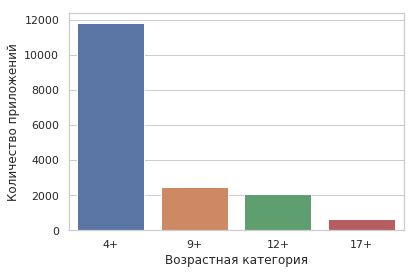

4+     11806
9+      2481
12+     2055
17+      665
Name: Age Rating, dtype: int64 
 Количество приложений в возрастных категориях


In [349]:
sns.countplot(x = 'Age Rating', data = data)
plt.xlabel('Возрастная категория')
plt.ylabel('Количество приложений')
plt.show()
print(data['Age Rating'].value_counts(), '\n', 'Количество приложений в возрастных категориях')

        median      mean  count
Price                          
0.00      4.50  4.071225   6325
0.99      4.00  3.903409    352
1.99      4.00  4.022388    201
2.99      4.25  4.000000    252
3.99      4.50  4.161905    105
4.99      4.50  4.062162    185
5.99      4.00  4.000000     28
6.99      4.50  4.173077     26
7.99      4.25  4.150000     10
8.99      4.00  4.166667     12
9.99      4.25  4.062500     48
11.99     4.50  4.166667      3
12.99     4.00  3.666667      3
14.99     3.75  3.750000      2
16.99     4.00  4.000000      1
19.99     4.00  4.100000      5
36.99     4.00  4.000000      1
59.99     4.00  4.000000      1
139.99    4.50  4.500000      1


Text(0, 0.5, 'Медианный рейтинг')

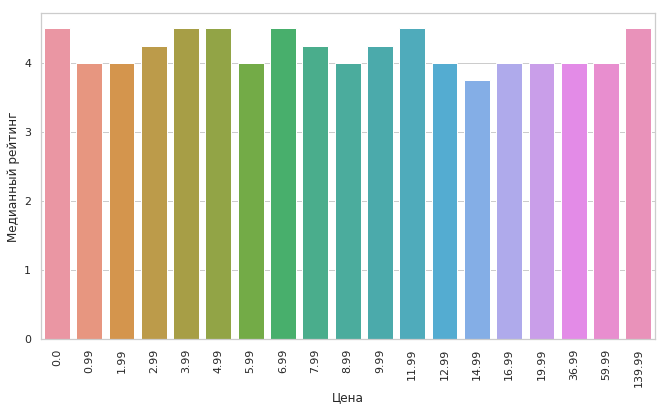

In [223]:
temp = data.groupby('Price')['Average User Rating'].agg(['median', 'mean', 'count'])
temp = temp[temp['count'] > 0]
print(temp)
plt.figure(figsize=(11, 6))
sns.barplot(x = temp['median'].index, y = temp['median'])
plt.xticks(rotation = 'vertical')
plt.xlabel('Цена')
plt.ylabel('Медианный рейтинг')


        median      mean  count
Price                          
0.00      4.50  4.071225   6325
0.99      4.00  3.903409    352
1.99      4.00  4.022388    201
2.99      4.25  4.000000    252
3.99      4.50  4.161905    105
4.99      4.50  4.062162    185
5.99      4.00  4.000000     28
6.99      4.50  4.173077     26
7.99      4.25  4.150000     10
8.99      4.00  4.166667     12
9.99      4.25  4.062500     48
11.99     4.50  4.166667      3
12.99     4.00  3.666667      3
14.99     3.75  3.750000      2
16.99     4.00  4.000000      1
19.99     4.00  4.100000      5
36.99     4.00  4.000000      1
59.99     4.00  4.000000      1
139.99    4.50  4.500000      1
18 18


Text(0, 0.5, 'Медианное количество')

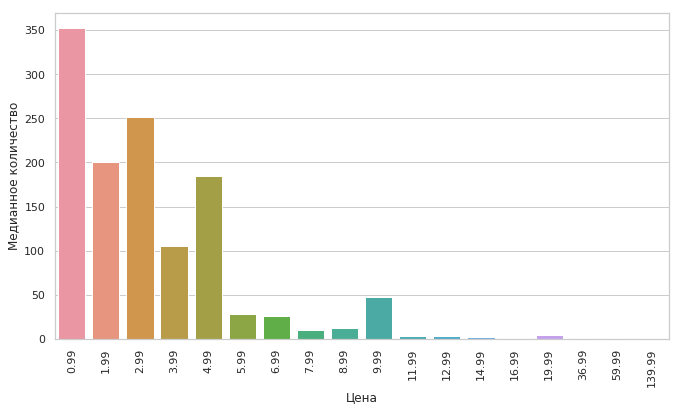

In [238]:
temp = data.groupby('Price')['Average User Rating'].agg(['median', 'mean', 'count'])
temp = temp[temp['count'] > 0]
print(temp)
plt.figure(figsize=(11, 6))
x_axis = list(temp['count'].index)[1:]
y_axis = list(temp['count'])[1:]
print(len(x_axis), len(y_axis))
sns.barplot(x = x_axis, y = y_axis)
plt.xticks(rotation = 'vertical')
plt.xlabel('Цена')
plt.ylabel('Медианное количество')

In [174]:
data.groupby('Primary Genre')['Average User Rating'].agg(['median', 'mean', 'count'])

,median,mean,count
Primary Genre,,,
Book,4.50,4.300000,5
Business,3.00,3.000000,2
Education,4.00,4.152174,46
Entertainment,4.00,3.831522,92
Finance,4.50,4.062500,8
Food & Drink,5.00,5.000000,1
Games,4.50,4.065903,7291
Health & Fitness,4.50,4.500000,3
Lifestyle,3.25,3.125000,4


Цена приложения, судя по графику, не влияет на оценку, хотя погодите... Посмотрим на количество купленных игр, в зависимости от цены

In [177]:
data.groupby('In-app Purchases')['Average User Rating'].agg(['median', 'mean', 'count'])

,median,mean,count
In-app Purchases,,,
0,4.00,3.333333,3
"0.0, 0.0",NaN,NaN,0
"0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0",3.25,3.250000,2
"0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.99, 0.99, 0.99",NaN,NaN,0
"0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.99, 2.99, 2.99",4.50,4.500000,1
...,...,...,...
"99.99, 9.99, 19.99, 4.99, 0.99, 49.99, 4.99",4.50,4.500000,1
"99.99, 9.99, 19.99, 4.99, 29.99, 49.99",4.00,4.000000,1
"99.99, 9.99, 29.99, 14.99, 4.99",NaN,NaN,0


Посмотрим, какая компания больше всего выпустила игр

In [245]:
data.groupby('Developer')['Developer'].count().nlargest()

Developer
Tapps Tecnologia da Informa\xe7\xe3o Ltda.    123
Vikash Patel                                  107
Netsummit Marketing, Inc.                      95
GabySoft                                       85
NetSummit Enterprises, Inc.                    77
Name: Developer, dtype: int64

/home/kuat/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/kuat/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


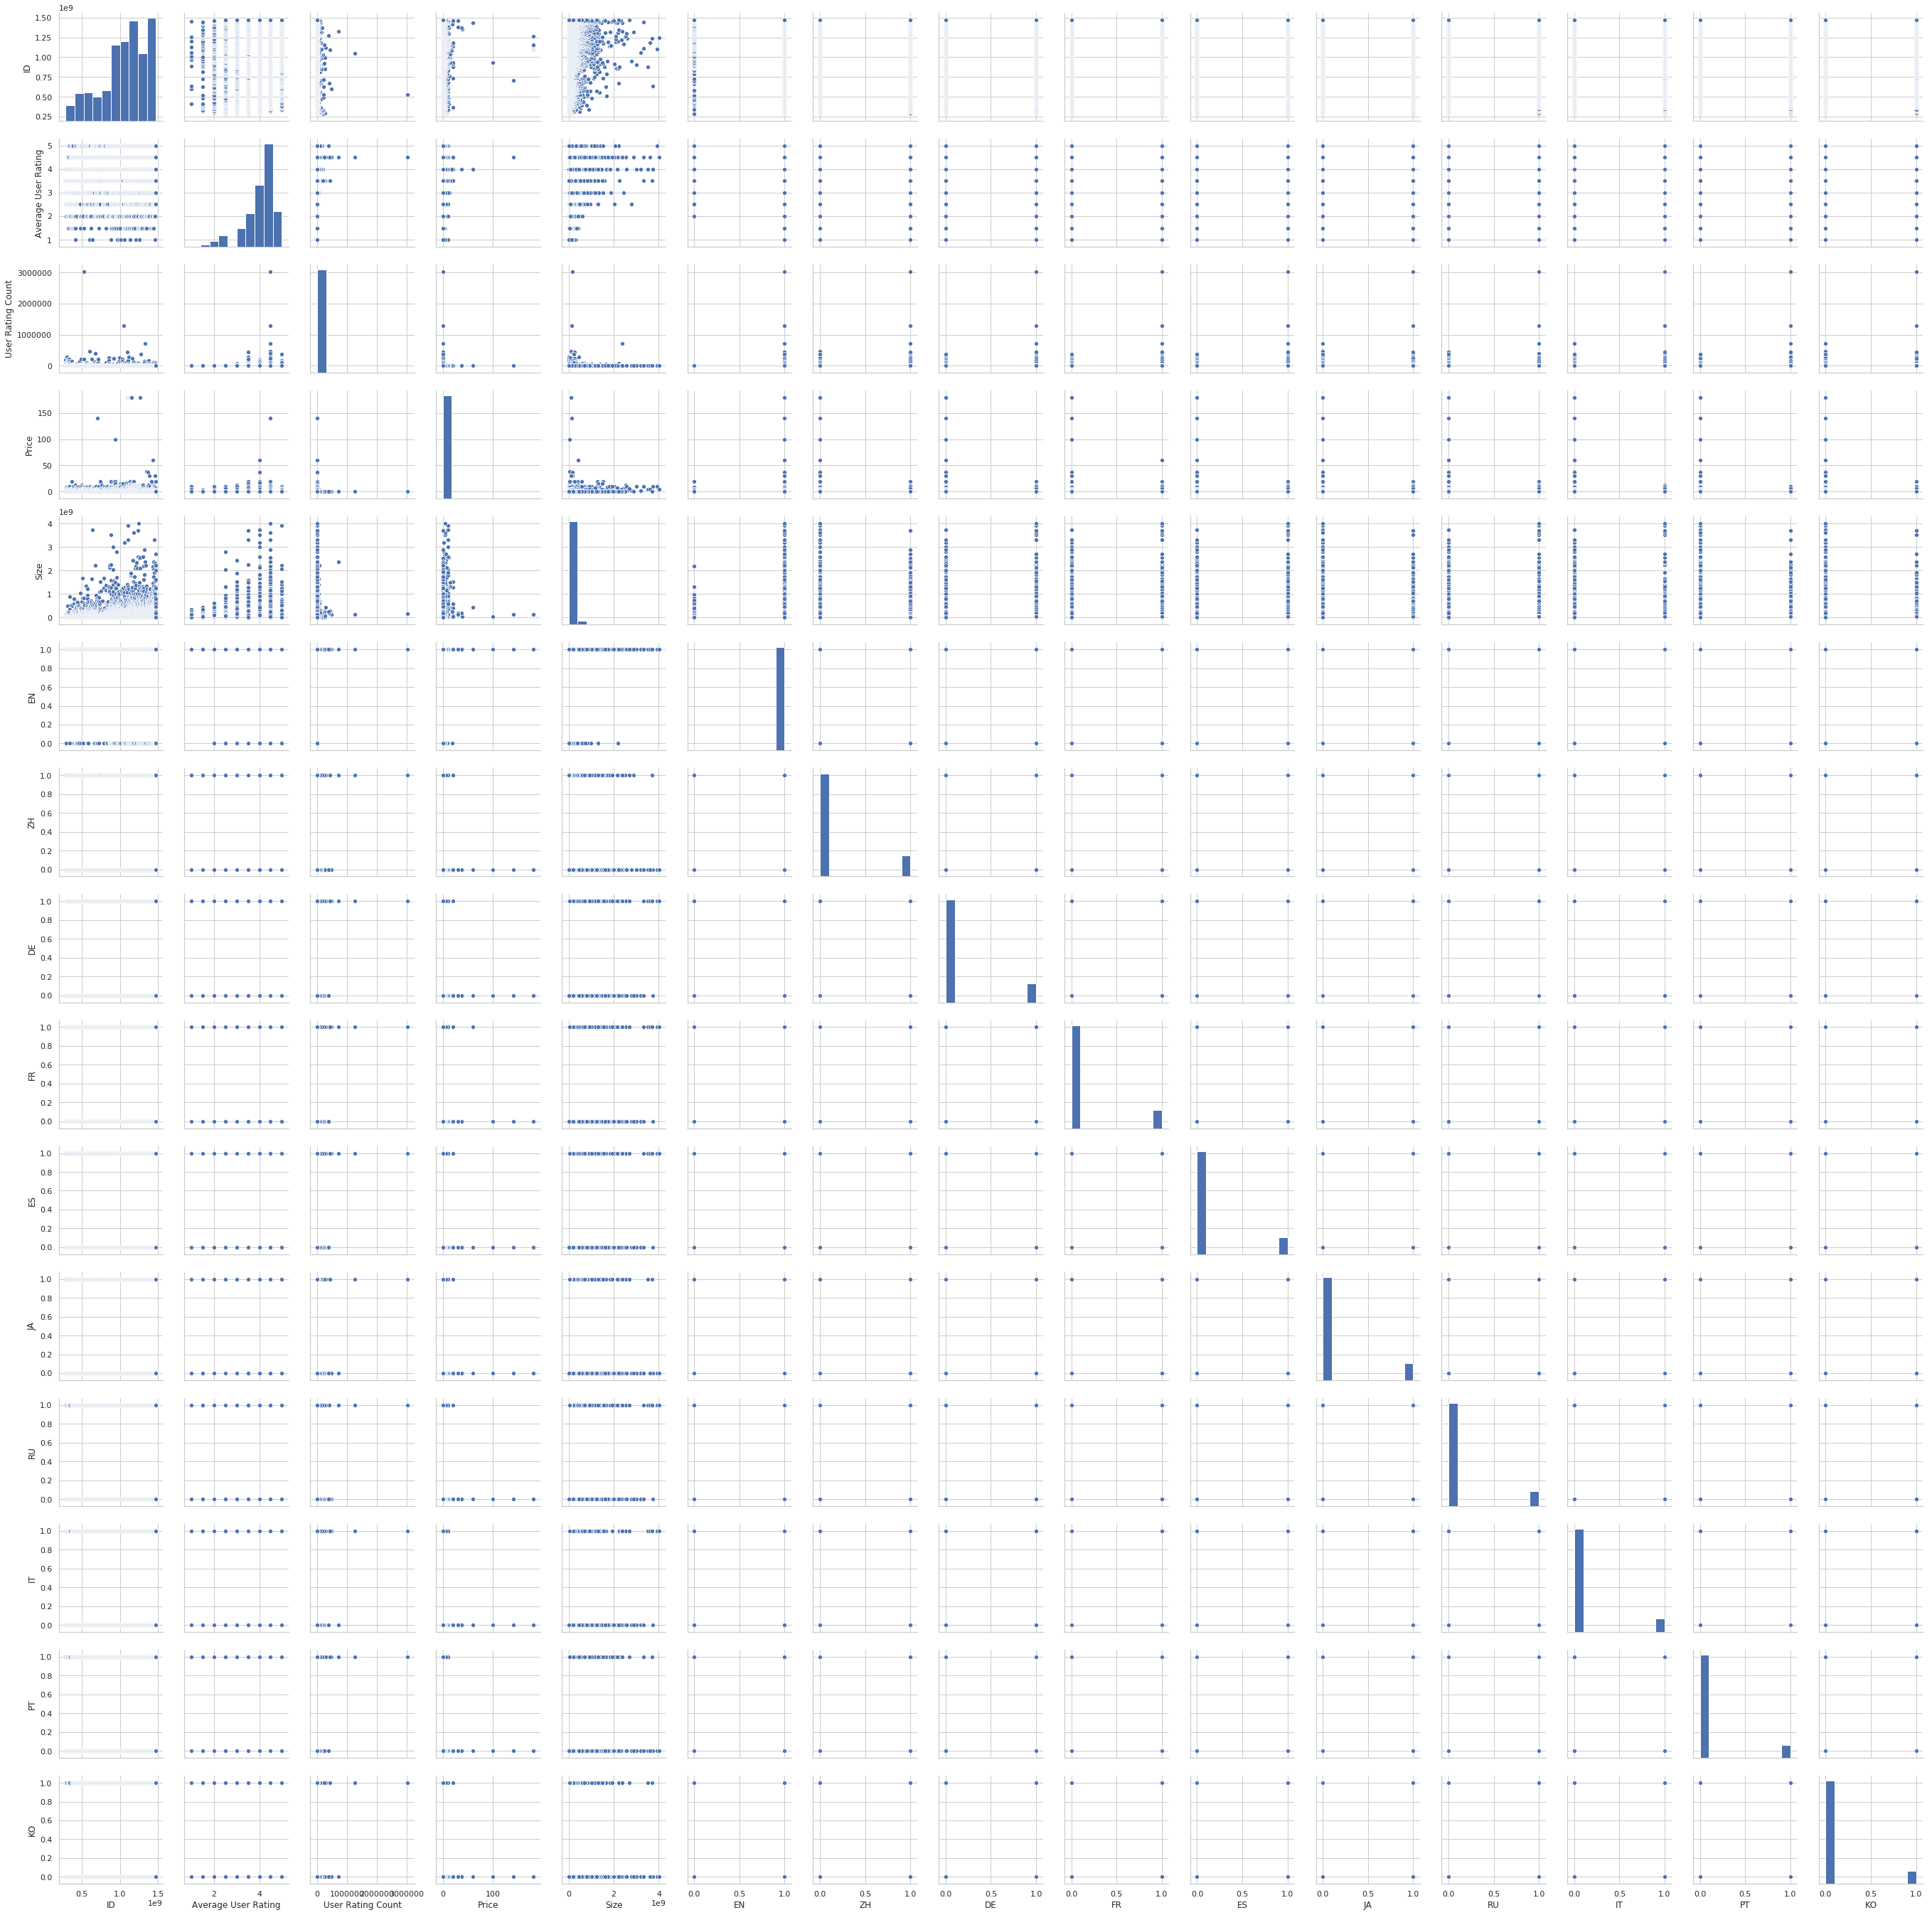

In [141]:
sns.pairplot(data)

Text(0, 0.5, 'Размер в байтах')

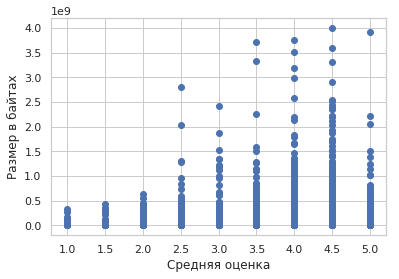

In [350]:
plt.scatter(x = data['Average User Rating'], y = data['Size'])
plt.xlabel('Средняя оценка')
plt.ylabel('Размер в байтах')

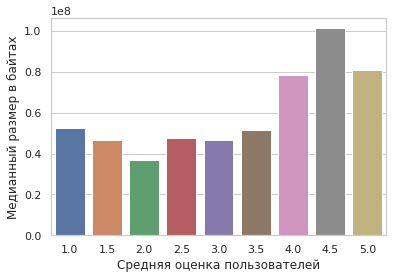

In [353]:
temp = data.groupby('Average User Rating')['Size'].agg(['median', 'mean'])
list(temp['median'].index)
sns.barplot(x = temp['median'].index, y = temp['median'])
plt.xlabel('Средняя оценка пользователей')
plt.ylabel('Медианный размер в байтах')
plt.show()